In [50]:
using Plots
using StatsPlots  
using DataFrames
using XLSX
using CSV

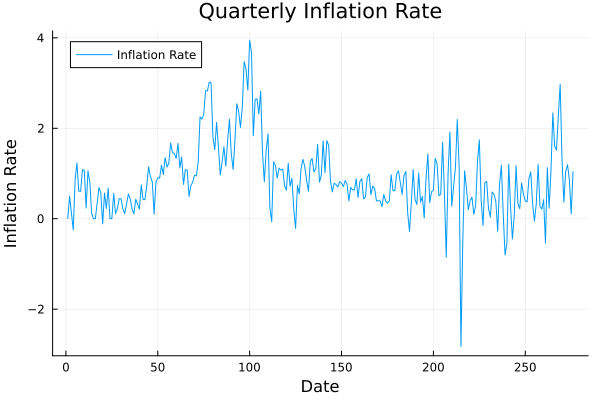

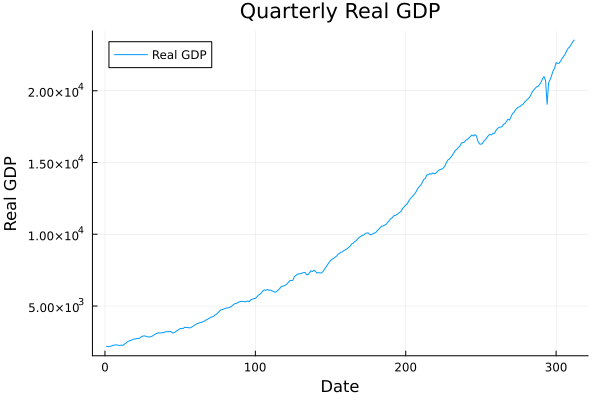

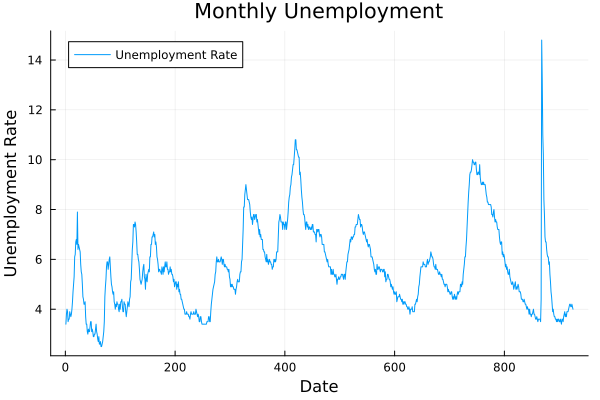

"data.csv"

In [51]:
# load data from csv files
π = CSV.read("quarterly inflation rate.csv", DataFrame)
y = CSV.read("quarterly real GDP.csv", DataFrame)
u = CSV.read("monthly unemployment.csv", DataFrame)

# for each data set, change the data from MM/DD/YYYY to MM/YYYY
for i in 1:size(π,1)
    π[i,1] = replace(π[i,1], r"(\d{2})/(\d{2})/(\d{4})" => s"\2/\3")
end
for i in 1:size(y,1)
    y[i,1] = replace(y[i,1], r"(\d{2})/(\d{2})/(\d{4})" => s"\2/\3")
end
for i in 1:size(u,1)
    u[i,1] = replace(u[i,1], r"(\d{2})/(\d{2})/(\d{4})" => s"\2/\3")
end

# Rename the second column of each DataFrame
rename!(π, names(π)[2] => :π)
rename!(y, names(y)[2] => :y)
rename!(u, names(u)[2] => :u)


# plot the data sets in three plots
display(plot(π[:,2], title = "Quarterly Inflation Rate", xlabel = "Date", ylabel = "Inflation Rate", label = "Inflation Rate", legend = :topleft))
display(plot(y[:,2], title = "Quarterly Real GDP", xlabel = "Date", ylabel = "Real GDP", label = "Real GDP", legend = :topleft))
display(plot(u[:,2], title = "Monthly Unemployment", xlabel = "Date", ylabel = "Unemployment Rate", label = "Unemployment Rate", legend = :topleft))


# merge datasets on obersevation date
data = data = innerjoin(π, y, on = :observation_date)
data = innerjoin(data, u, on = :observation_date)


# save merged data to csv file
CSV.write("data.csv", data)

#

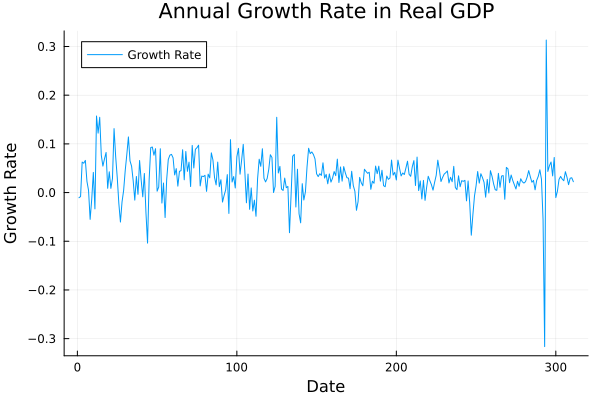

In [52]:
# get annual growth rate in real GDP
y_growth = DataFrame(Date = y[2:end, 1], Real_GDP = (y[2:end, 2] .- y[1:end-1, 2]) ./ y[1:end-1, 2]*4)
display(plot(y_growth[:,2], title = "Annual Growth Rate in Real GDP", xlabel = "Date", ylabel = "Growth Rate", label = "Growth Rate", legend = :topleft))

Row,observation_date,π,y,u
,String15,Float64,Float64,Float64
1,4/1/1955,0.0,3069.91,4.7
2,7/1/1955,0.499376,3111.38,4.0
3,10/1/1955,0.124224,3130.07,4.3
4,1/1/1956,-0.248139,3117.92,4.0
5,4/1/1956,0.870647,3143.69,4.0
6,7/1/1956,1.23305,3140.87,4.4
7,10/1/1956,0.609013,3192.57,3.9
8,1/1/1957,0.605327,3213.01,4.2
9,4/1/1957,1.08303,3205.97,3.9


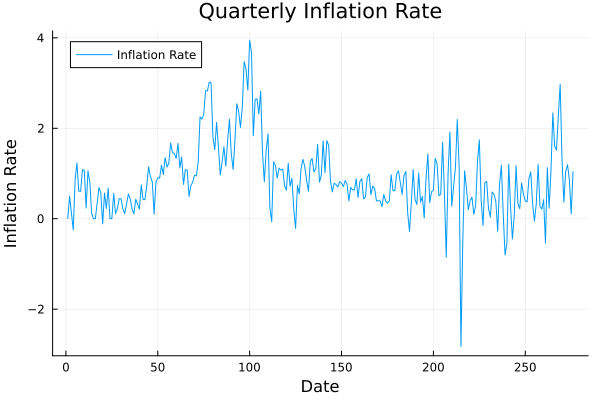

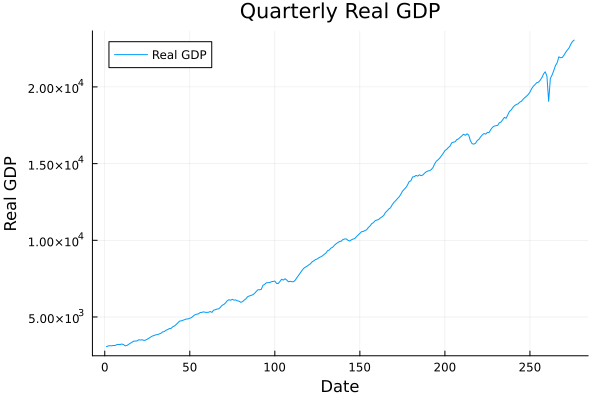

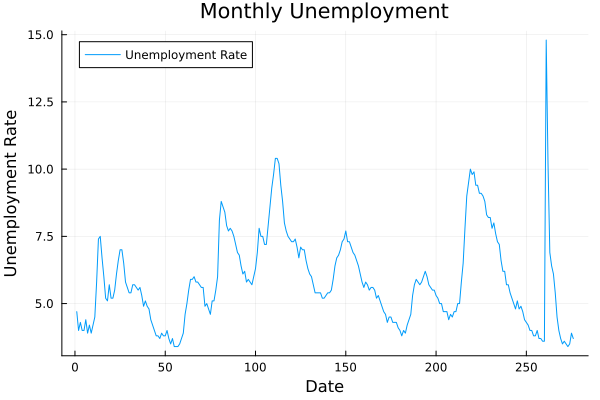

In [55]:
# load data from data.csv
data = CSV.read("data.csv", DataFrame)
display(data)


# plot the data sets in three plots
display(plot(data[:,2], title = "Quarterly Inflation Rate", xlabel = "Date", ylabel = "Inflation Rate", label = "Inflation Rate", legend = :topleft))
display(plot(data[:,3], title = "Quarterly Real GDP", xlabel = "Date", ylabel = "Real GDP", label = "Real GDP", legend = :topleft))
display(plot(data[:,4], title = "Monthly Unemployment", xlabel = "Date", ylabel = "Unemployment Rate", label = "Unemployment Rate", legend = :topleft))
